<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187   

C:\Users\Centre of Excellence\AppData\Local\Temp\ipykernel_96032\2664763716.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="Set2")


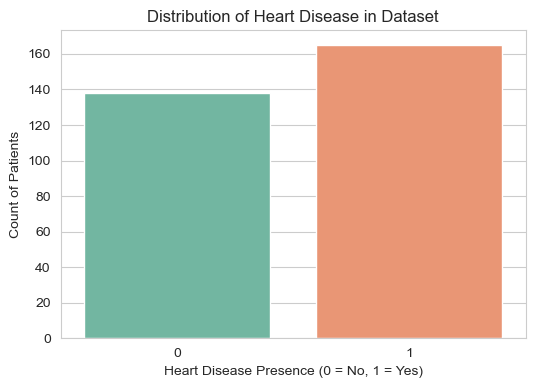

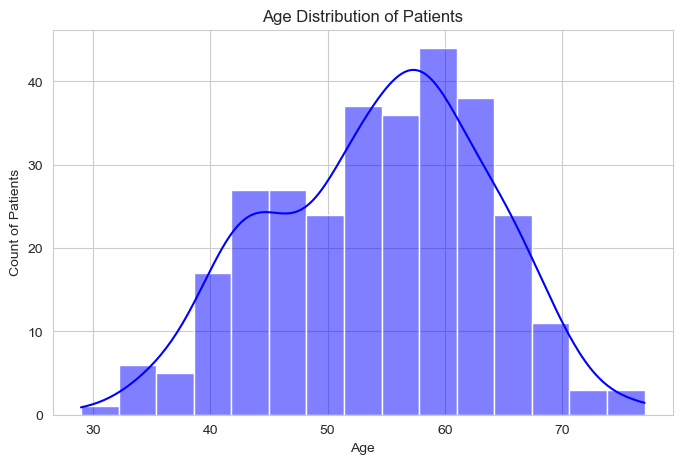

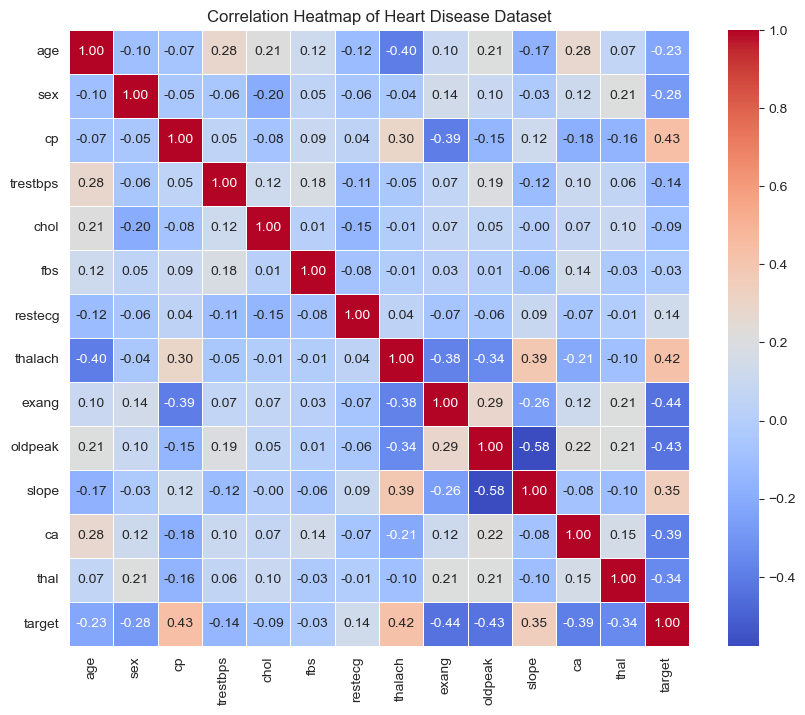

C:\Users\Centre of Excellence\AppData\Local\Temp\ipykernel_96032\2664763716.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["target"], y=df["chol"], palette="coolwarm")


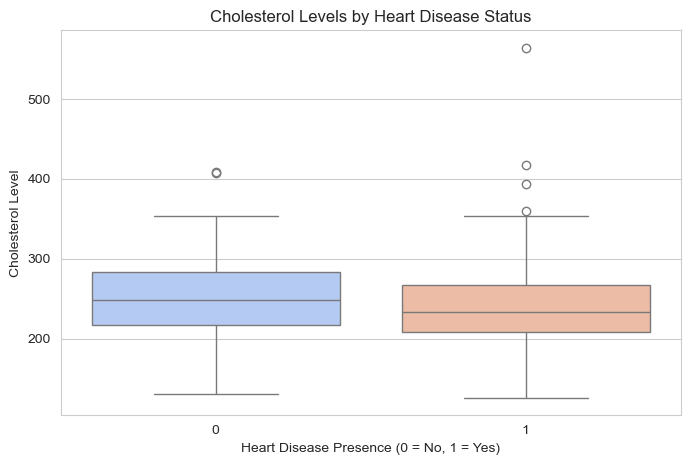

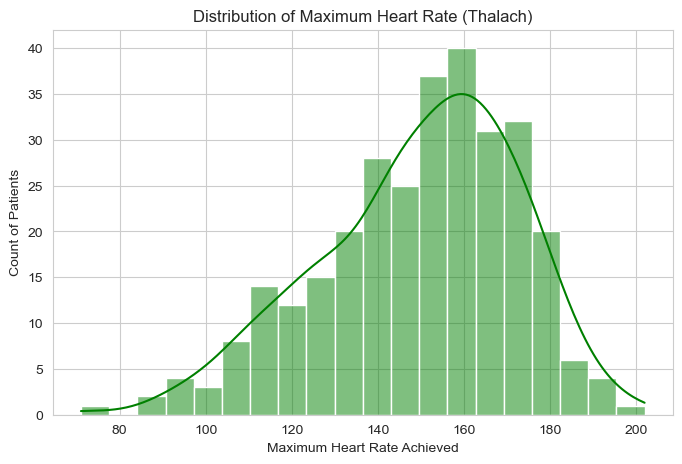

Analysis Completed Successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "heart.csv"  # Ensure the dataset is in the same directory

# Read the CSV file
df = pd.read_csv(file_path)

# Display basic info
df.info()
print(df.head())

# Set style for plots
sns.set_style("whitegrid")

# Plot 1: Distribution of Heart Disease Presence
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"], palette="Set2")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Count of Patients")
plt.title("Distribution of Heart Disease in Dataset")
plt.show()

# Plot 2: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["age"], bins=15, kde=True, color="blue")
plt.xlabel("Age")
plt.ylabel("Count of Patients")
plt.title("Age Distribution of Patients")
plt.show()

# Plot 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Dataset")
plt.show()

# Plot 4: Cholesterol Levels by Heart Disease Status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["target"], y=df["chol"], palette="coolwarm")
plt.xlabel("Heart Disease Presence (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level")
plt.title("Cholesterol Levels by Heart Disease Status")
plt.show()

# Plot 5: Maximum Heart Rate Achieved (thalach) Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["thalach"], bins=20, kde=True, color="green")
plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Count of Patients")
plt.title("Distribution of Maximum Heart Rate (Thalach)")
plt.show()

print("Analysis Completed Successfully!")


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Confusion Matrix:
[[32  9]
 [ 8 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



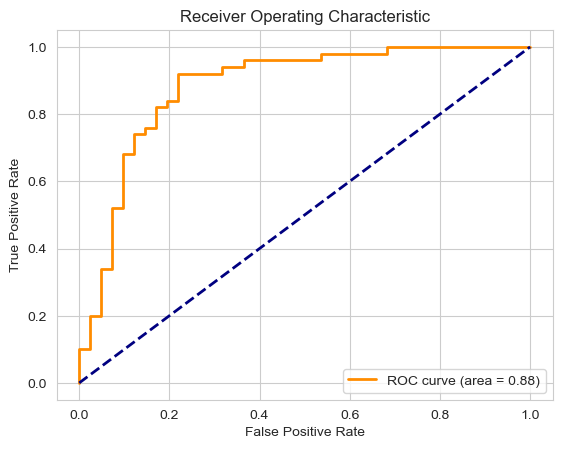

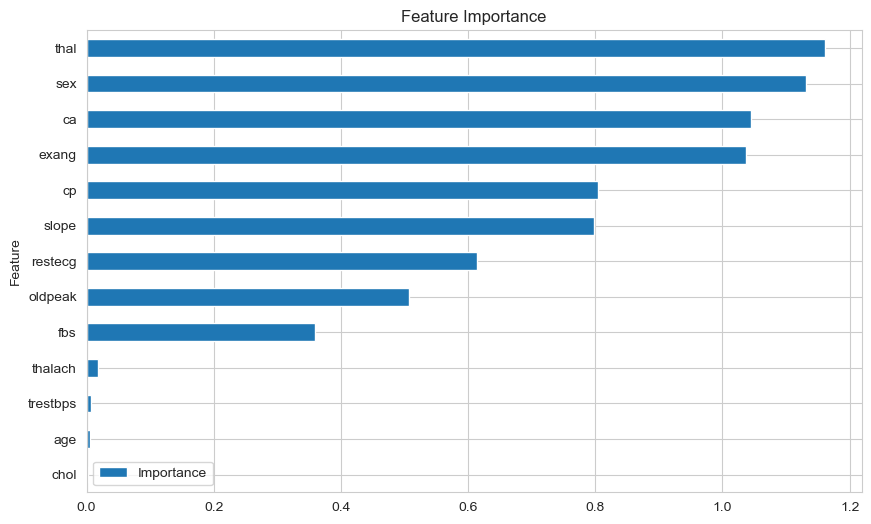

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the data
df = pd.read_csv('heart.csv')

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(importance)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Confusion Matrix:
[[32  9]
 [ 8 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



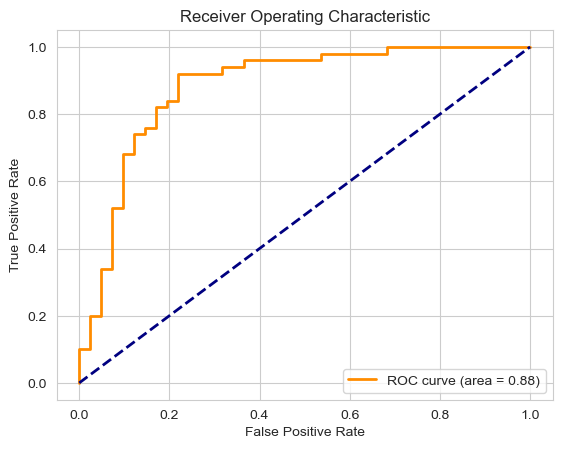

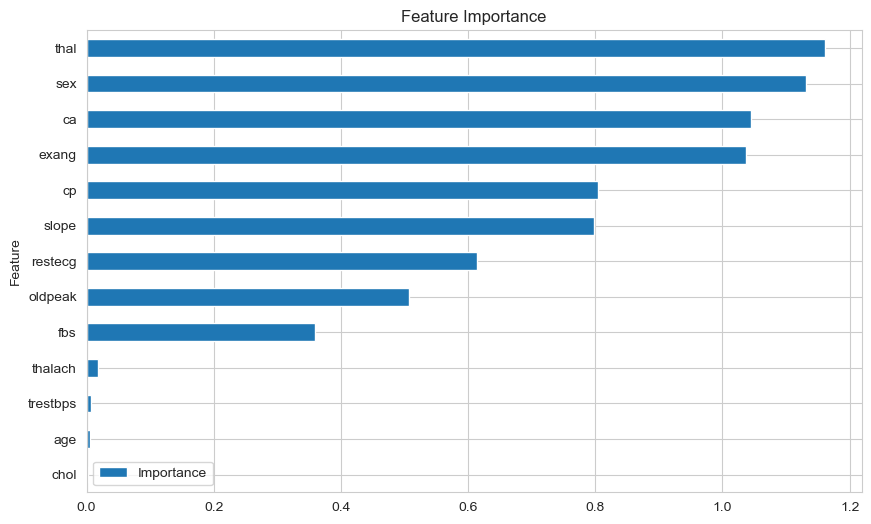

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Load the data
df = pd.read_csv('heart.csv')

# Data Preprocessing
# Check for missing values
print(df.isnull().sum())

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
importance = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(importance)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.show()

In [10]:
+-------------------+       +-------------------+       +-------------------+
|   Data Collection | ----> | Data Preprocessing | ----> | Feature Selection |
+-------------------+       +-------------------+       +-------------------+
        |                           |                           |
        |                           |                           |
        v                           v                           v
+-------------------+       +-------------------+       +-------------------+
|  Dataset: 303     |       | Handle Missing    |       | Identify Key      |
|  Patient Records  |       | Values, Normalize |       | Features (e.g.,   |
|  with 14 Features |       | Data, Encode      |       | thalach, oldpeak) |
+-------------------+       | Categorical Vars  |       +-------------------+
                            +-------------------+                   |
                                                                   |
                                                                   v
+-------------------+       +-------------------+       +-------------------+
|   Model Training  | <---- | Data Splitting    | ----> | Model Evaluation  |
+-------------------+       +-------------------+       +-------------------+
        |                   | Train-Test Split  |                   |
        |                   | (70-30 or 80-20)  |                   |
        v                   +-------------------+                   v
+-------------------+                                           +-------------------+
| Logistic          |                                           | Performance       |
| Regression        |                                           | Metrics:          |
| (or other ML      |                                           | - Accuracy        |
| algorithms)       |                                           | - Precision       |
+-------------------+                                           | - Recall          |
        |                                                       | - F1-Score        |
        |                                                       | - ROC-AUC         |
        v                                                       +-------------------+
+-------------------+                                                   |
| Model Optimization| <-------------------------------------------------+
+-------------------+
        |
        | (Hyperparameter Tuning, Feature Engineering)
        v
+-------------------+
| Model Deployment  |
+-------------------+
        |
        | (Deploy model for real-world use in healthcare settings)
        v
+-------------------+
|  Actionable       |
|  Insights for     |
|  Healthcare       |
|  Providers        |
+-------------------+

SyntaxError: invalid syntax (3588602518.py, line 1)

C:\Users\Centre of Excellence\AppData\Local\Temp\ipykernel_96032\1654613458.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Value (%)', data=metrics_df, palette='viridis')


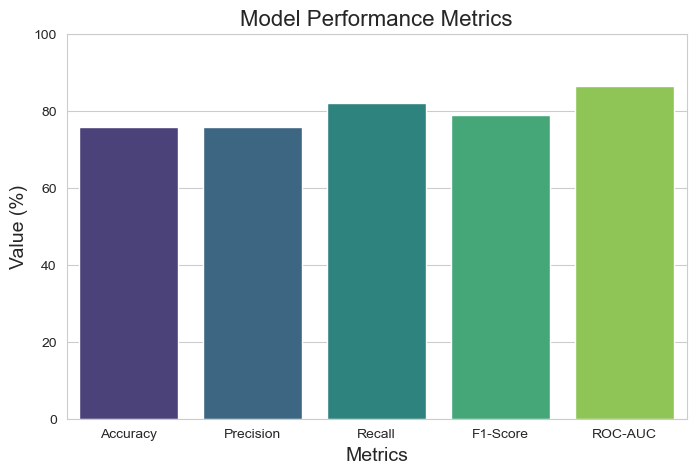

Model Performance Metrics:
   Metric  Value (%)
 Accuracy       75.8
Precision       75.9
   Recall       82.0
 F1-Score       78.8
  ROC-AUC       86.4


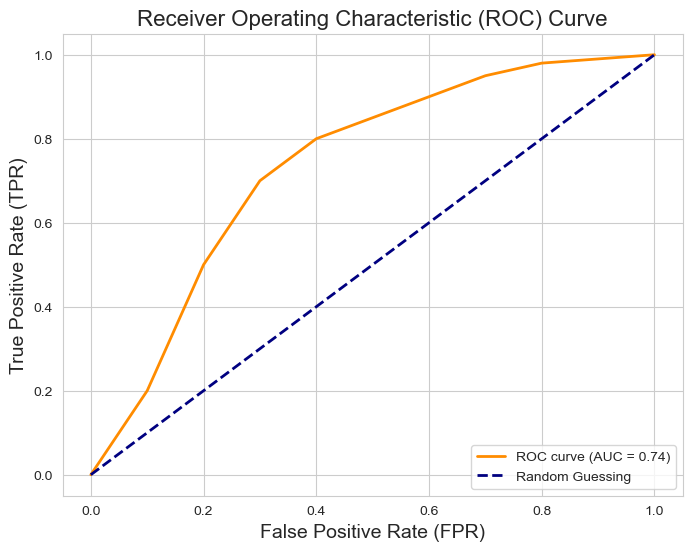

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_curve, auc

# Performance metrics data
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Value (%)': [75.8, 75.9, 82.0, 78.8, 86.4]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value (%)', data=metrics_df, palette='viridis')
plt.title('Model Performance Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Value (%)', fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

# Table
print("Model Performance Metrics:")
print(metrics_df.to_string(index=False))

# ROC Curve
# Example data for ROC curve (replace with your actual FPR and TPR values)
fpr = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
tpr = [0.0, 0.2, 0.5, 0.7, 0.8, 0.85, 0.9, 0.95, 0.98, 0.99, 1.0]
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right')
plt.show()